## Grouping data : groupby operation

We have already used cross-tabs to compare and relate variables and highlight correlations, for example on voting intention depending on gender. Today we are going to look at a broader tool than the cross-tab operation.

A *groupby* operation can be very useful because it allows us to split an object, apply a function, and mostly combine the results. This is called the "split-apply-combine" pattern, and it is a powerful tool to analyze data across different categories. It will help us to group large amounts of data and compute operations on these groups.

![](https://keytodatascience.com/wp-content/uploads/2020/04/image-1.png)


## Why ?

This basically serves to give meaning to the data that has been collected. It allows grouping to make correlations between two responses and to determine social phenomena. 

Concrete exemple : if we look at the ANES codebook, we can ask a question such as: do LGBTi people vote more for Trump or Biden? But we can push the question further by adding a variable such as: are LGBTi people in the north of the US closer to voting Biden than those in the south? 



## How?

The first step is to import the data and clean it up in order to get meaningful results.
I start with the variable of voting intentions V201336 and then the sexual orientation variable V201601.

In [ ]:
import pandas as pd

# Import Data
data_url = "https://raw.githubusercontent.com/datamisc/ts-2020/main/data.csv"
df = pd.read_csv(data_url, compression='gzip')

# Cleaning the voting intentions variable
values = [1,2]
labels = ["J.Biden", "D.Trump"]
df['Intentions'] = df['V201033'].replace([3,4,5,11,12,-9,-8, -1], pd.NA)
df['Intentions'] = df['Intentions'].replace(values, labels)

# Cleaning the sexual orientation variable
values=[1,2,3,4]
labels=["Heterosexual", "LGBTI", "LGBTI", "LGBTI"]

df['V201601'] = df['V201601'].replace([-9,-5], pd.NA)
df['V201601'] = df['V201601'].replace(values, labels)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,17,18,19,21,22,23,25,26,27,29,30,31,33,34,35,37,38,1508,1509) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


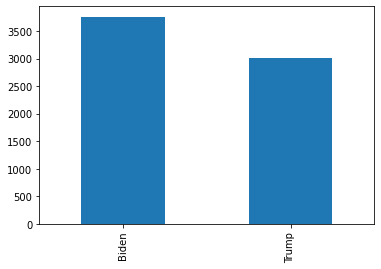

In [ ]:
# mask = df['V201033'] >= 1
# mask = df['V201033'] <= 2

mask = df['V201033'].between(1,2)
df = df[mask]

Biden = df["V201033"] == 1
df.loc[Biden,"V201033"] = "Biden"

Trump = df["V201033"] == 2
df.loc[Trump,"V201033"] = "Trump"

values=[1,2]
labels=["1. Biden","2.Trump"]
df["V201033"].value_counts().sort_index().plot.bar()


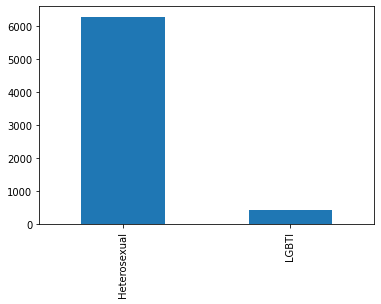

In [ ]:
df["V201601"].value_counts().sort_index().plot.bar()

In [ ]:
mon_groupe = ['V201033']
df.groupby(mon_groupe)['V201601'].value_counts(normalize=True)

V201033  V201601     
Biden    Heterosexual    0.908601
         LGBTI           0.091399
Trump    Heterosexual    0.977860
         LGBTI           0.022140
Name: V201601, dtype: float64

Here we already have some results: we can see that among Biden voters (1)  = **9,1%** are from the LGBTI community. For Trump (2), **2.2%** only.

In [ ]:
mon_groupey = ['V201601']
df.groupby(mon_groupey)['V201033'].value_counts(normalize=True)

V201601       V201033
Heterosexual  Biden      0.536197
              Trump      0.463803
LGBTI         Biden      0.837037
              Trump      0.162963
Name: V201033, dtype: float64

It is also interesting in this way: among LGBTI people, almost 84% intend to vote for Biden.

Now we will enter a third variable: the one that shows the region of the respondents.

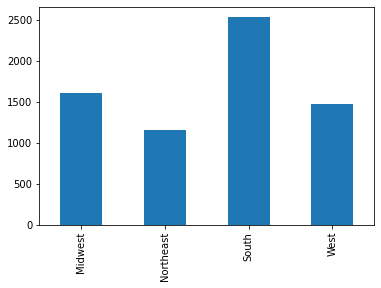

In [ ]:
Northeast = df["V203003"] == 1
df.loc[Northeast,"V203003"] = "Northeast"

Midwest = df["V203003"] == 2
df.loc[Midwest,"V203003"] = "Midwest"

South = df["V203003"] == 3
df.loc[South,"V203003"] = "South"

West = df["V203003"] == 4
df.loc[West,"V203003"] = "West"

values=[1,2,3,4]
labels=["1. Northeast", "2. Midwest", "3. South", "4. West"]
df["V203003"].value_counts().sort_index().plot.bar()


In [ ]:
mon_groupex = ['V201601','V201033']
df.groupby(mon_groupex)['V203003'].value_counts(normalize=True)



V201601       V201033  V203003  
Heterosexual  Biden    South        0.336499
                       West         0.245401
                       Midwest      0.229377
                       Northeast    0.188724
              Trump    South        0.423328
                       Midwest      0.252830
                       West         0.179417
                       Northeast    0.144425
LGBTI         Biden    South        0.297935
                       West         0.271386
                       Northeast    0.244838
                       Midwest      0.185841
              Trump    South        0.424242
                       Midwest      0.303030
                       West         0.196970
                       Northeast    0.075758
Name: V203003, dtype: float64



We can try with a new variable to get more significant results: the opinion on homosexual marriage.

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


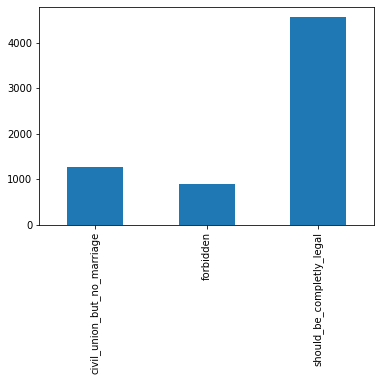

In [ ]:
# Clean the variable V201416 on homosexual marriage opinion.
mask = df['V201416'].between(1,3)
df = df[mask]

should_be_completly_legal = df["V201416"] == 1
df.loc[should_be_completly_legal,"V201416"] = "should_be_completly_legal"

civil_union_but_no_marriage = df["V201416"] == 2
df.loc[civil_union_but_no_marriage,"V201416"] = "civil_union_but_no_marriage"

forbidden = df["V201416"] == 3
df.loc[forbidden,"V201416"] = "forbidden"

values=[1,2,3]
labels=['should be completly legal', 'civil union but no marriage', 'forbidden']

df["V201416"].value_counts().sort_index().plot.bar()


In [ ]:
mon_groupex =['V201601','V201033']
df.groupby(mon_groupex)['V201416'].value_counts(normalize=True)

V201601       V201033  V201416                    
Heterosexual  Biden    should_be_completly_legal      0.838700
                       civil_union_but_no_marriage    0.102266
                       forbidden                      0.059034
              Trump    should_be_completly_legal      0.460791
                       civil_union_but_no_marriage    0.306731
                       forbidden                      0.232477
LGBTI         Biden    should_be_completly_legal      0.952522
                       forbidden                      0.035608
                       civil_union_but_no_marriage    0.011869
              Trump    should_be_completly_legal      0.753846
                       civil_union_but_no_marriage    0.215385
                       forbidden                      0.030769
Name: V201416, dtype: float64

We cross-tabulated three variables here: sexual orientation, voting intention and opinion on gay marriage. We can read the data like this: among LGBTI people who voted for Trump, **21.5%** think that gay marriage should not be legal, only civil unions.

## Resources



- [https://www.youtube.com/watch?v=LVoSlpm7QEY](): Youtube video that explains with a screen how groupby works.
- [https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html](www.example.com): Describes step by step the different things you can do with groupby.


